In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install skimpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\diogenes monegro\appdata\local\programs\python\python311\lib\site-packages (3.8.0)




[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim


# Get data

In [4]:
df = pd.read_csv("../datasets/salary.csv")

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2639   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ AGE                 │   3 │  0.11 │  24.76 │  3.908 │     21 │     22 │     24 │     25 │      45 │  ▇▃▁   │  │
│ │ SALARY              │   0 │     0 │  58140 │  36880 │  40000 │  43420 │  46780 │  51400 │  388100 │   ▇    │  │
│ │ LEAVES USED         │   3 │  0.11 │   22.5 │  4.604 │     15 │     19 │     22 │     26 │      30 │ ▇▅▇▅▇▇ │  │
│ │ LEAVES REMAINING    │   2 │  0.08 │  7.503 │  4.603 │      0 │      4 │      8 │     11 │      15 │ ▇▅▇▅▇▇ │  │
│ │ RATINGS             │   2 │  0.08 │  3.486 │  1.115 │      2 │      2 │      3 │      4 │       5 │ ▇ ▇ ▇▇ │  │
│ │ PAST EXP            │   0 │     0 │  1.567 │  2.728 │      0 │      0 │      1 │      2 │      23 │   ▇▁   │  │
│ └─────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ FIRST NAME                 │      0 │          0 │                            1 │                     2639 │  │
│ │ LAST NAME                  │      2 │       0.08 │                            1 │                     2637 │  │
│ │ SEX                        │      0 │          0 │                            1 │                     2639 │  │
│ │ DOJ                        │      1 │       0.04 │                            1 │                     2638 │  │
│ │ CURRENT DATE               │      0 │          0 │                            1 │                     2639 │  │
│ │ DESIGNATION                │      0 │          0 │                          1.2 │                     3057 │  │
│ │ UNIT                       │      0 │          0 │                            1 │                     2639 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2631 non-null   object 
 1   LAST NAME         2631 non-null   object 
 2   SEX               2631 non-null   object 
 3   DOJ               2631 non-null   object 
 4   CURRENT DATE      2631 non-null   object 
 5   DESIGNATION       2631 non-null   object 
 6   AGE               2631 non-null   float64
 7   SALARY            2631 non-null   int64  
 8   UNIT              2631 non-null   object 
 9   LEAVES USED       2631 non-null   float64
 10  LEAVES REMAINING  2631 non-null   float64
 11  RATINGS           2631 non-null   float64
 12  PAST EXP          2631 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 287.8+ KB


In [9]:
np.random.seed(43)
df.sample(10)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
1131,DORIAN,ALBREKHT,M,06-10-2014,01-07-2016,Analyst,25.0,43794,IT,15.0,15.0,5.0,2
274,JODI,AMISTADI,F,8-13-2013,01-07-2016,Analyst,24.0,49110,IT,25.0,5.0,2.0,1
540,MARSHALL,ACKISON,M,04-04-2014,01-07-2016,Analyst,24.0,45776,Management,17.0,13.0,4.0,1
1977,ROSIE,AMILL,F,2-18-2013,01-07-2016,Analyst,24.0,49901,Web,24.0,6.0,4.0,0
2214,FIDEL,AHLE,M,07-04-2014,01-07-2016,Analyst,23.0,42012,IT,30.0,0.0,5.0,0
2495,MERLE,APARICIO,F,07-09-2013,01-07-2016,Analyst,22.0,45147,Marketing,30.0,0.0,2.0,0
390,DOUG,ADALJA,M,07-12-2013,01-07-2016,Analyst,23.0,45152,Web,15.0,15.0,4.0,0
432,MARLON,AGBISIT,M,03-02-2014,01-07-2016,Analyst,21.0,40396,Marketing,28.0,2.0,2.0,0
54,ANGELITA,ARAGUS,F,08-04-2013,01-07-2016,Analyst,25.0,46436,IT,27.0,3.0,4.0,2
1588,GERALDINE,ALVARRACIN,F,9-30-2012,01-07-2016,Senior Manager,39.0,180778,Finance,23.0,7.0,4.0,11


In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['first name', 'last name', 'sex', 'doj', 'current date', 'designation',
       'age', 'salary', 'unit', 'leaves used', 'leaves remaining', 'ratings',
       'past exp'],
      dtype='object')

In [11]:
df['unit'].value_counts()

unit
IT            460
Finance       445
Operations    437
Marketing     436
Web           428
Management    425
Name: count, dtype: int64

In [12]:
df["designation"].value_counts()

designation
Analyst           1943
Senior Analyst     356
Associate          158
Manager             81
Senior Manager      61
Director            32
Name: count, dtype: int64

In [13]:
df["sex"].value_counts()

sex
F    1340
M    1291
Name: count, dtype: int64

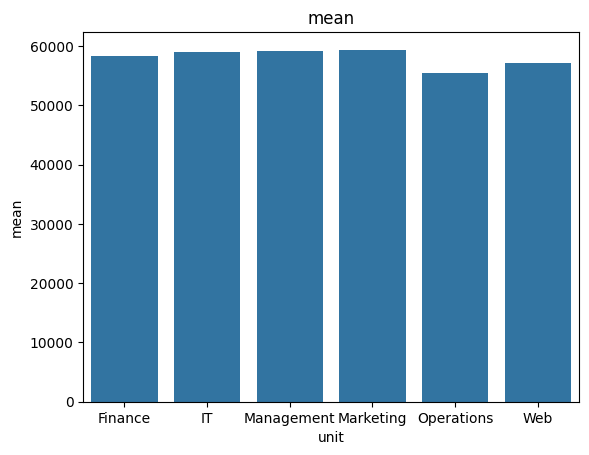

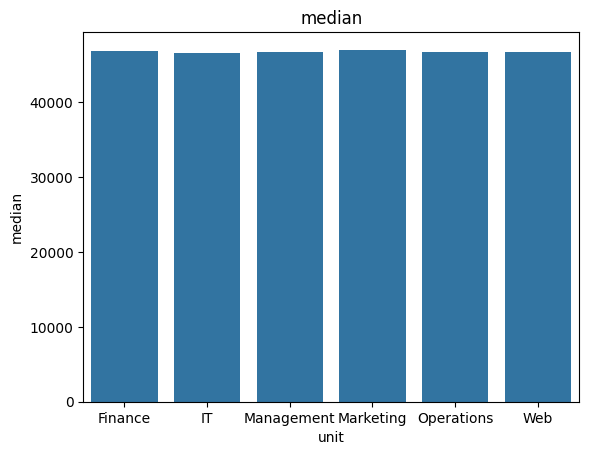

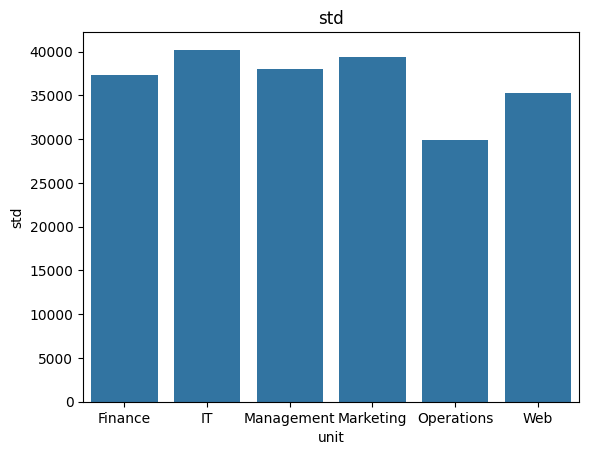

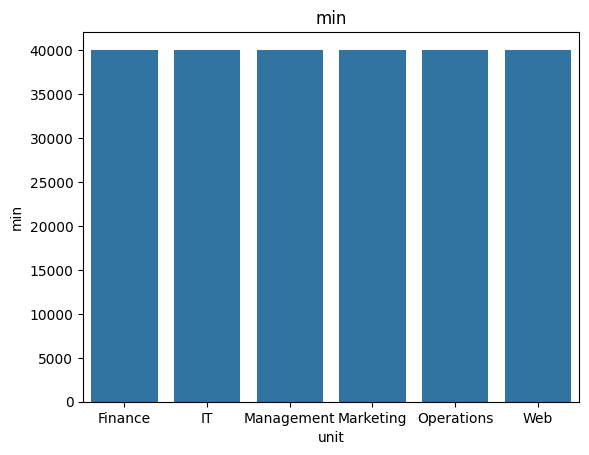

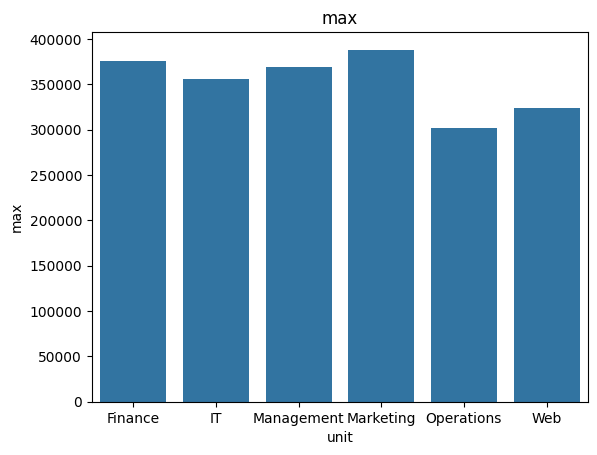

In [14]:
# calculate the mean salary for each unit
df_unit_by_salary = df.groupby('unit')['salary'].agg(['mean', 'median', 'std', 'min', 'max'])

for col in df_unit_by_salary.columns:
    sns.barplot(x=df_unit_by_salary.index, y=df_unit_by_salary[col])
    plt.title(col)
    plt.show()

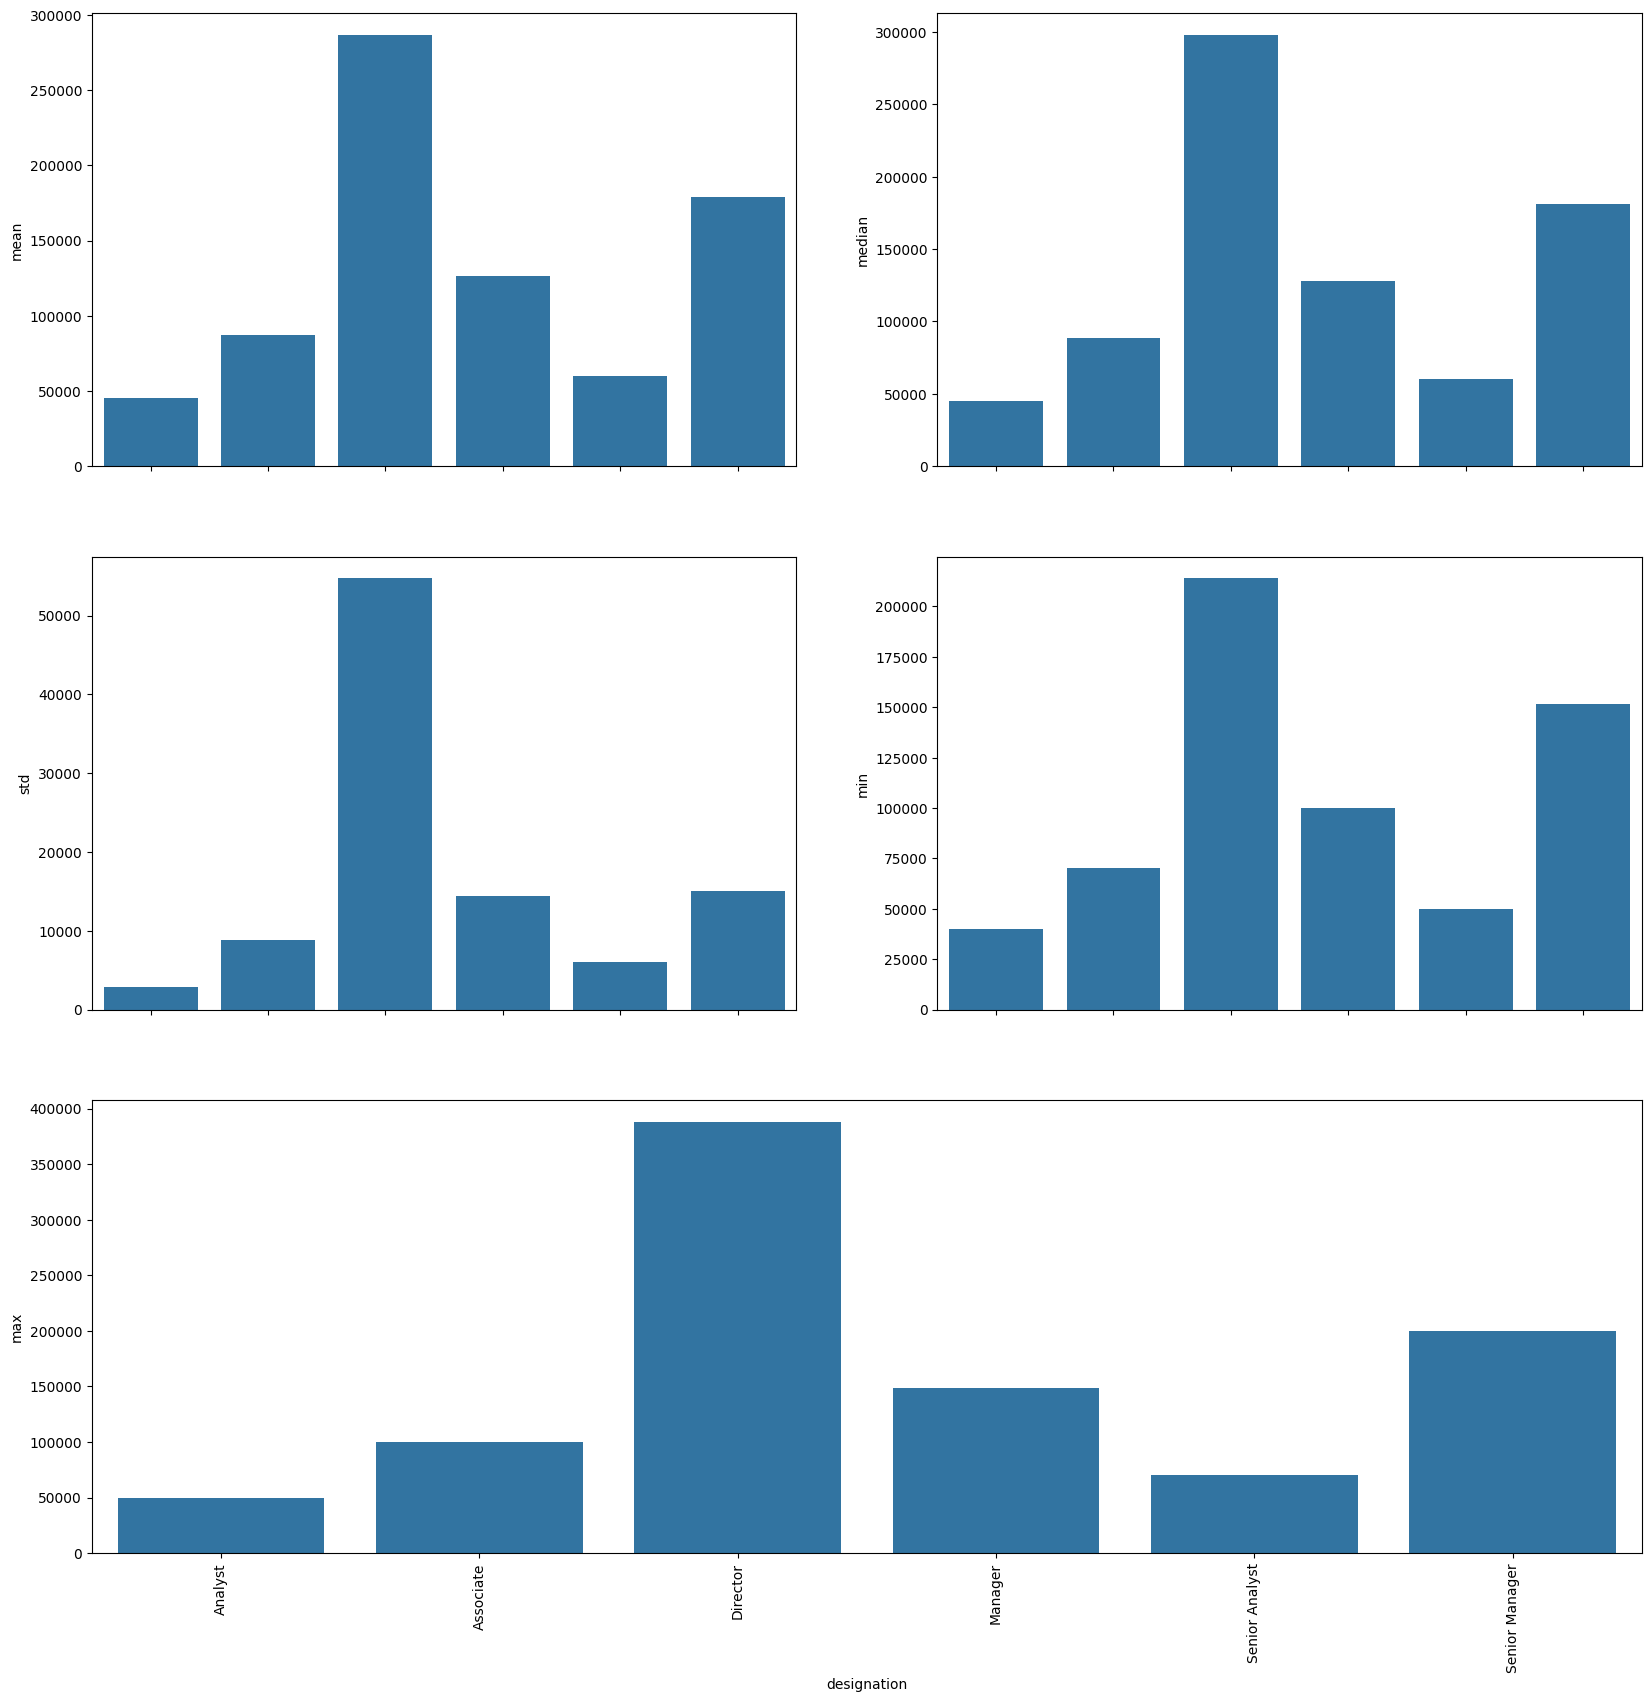

In [17]:


df_designation_by_salary = df.groupby('designation')['salary'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# create a mosaic plot for the mean salary of each designation
fig, ax = plt.subplot_mosaic([['mean', 'median'], ['std', 'min'], ['max', 'max']], sharex=True, sharey=False, figsize=(20, 20))
sns.barplot(x='designation', y='mean', data=df_designation_by_salary, ax=ax['mean'])
sns.barplot(x='designation', y='median', data=df_designation_by_salary, ax=ax['median'])
sns.barplot(x='designation', y='std', data=df_designation_by_salary, ax=ax['std'])
sns.barplot(x='designation', y='min', data=df_designation_by_salary, ax=ax['min'])
sns.barplot(x='designation', y='max', data=df_designation_by_salary, ax=ax['max'])
plt.xticks(rotation=90)
plt.show()

In [16]:
df_salary_by_exp = df['past exp'].value_counts().reset_index()

df_salary_by_exp

,past exp,count
0,0,1298
1,1,494
2,2,360
3,3,167
4,5,56
5,4,56
6,6,47
7,8,27
8,7,26
9,10,21


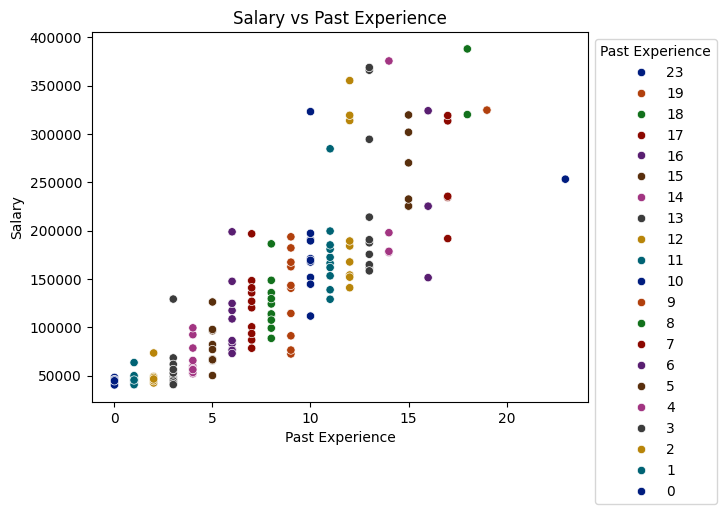

In [37]:
# get 10 examples of each past experience
df_exp_10 = df.groupby('past exp').head(10)
df_exp_10 = df_exp_10[['past exp', 'salary']].sort_values('past exp', ascending=False).reset_index(drop=True)
df_exp_10


ax= sns.scatterplot(x='past exp', y='salary', data=df_exp_10, palette='dark', hue='past exp', hue_order=df_exp_10['past exp'].unique())
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1), title='Past Experience')
plt.title('Salary vs Past Experience')
plt.xlabel('Past Experience')
plt.ylabel('Salary')
plt.show()